In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
}
headers = {
    'Accepts':'application/json',
    'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
except(ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [ ]:
type(data)

In [ ]:
import pandas as pd

#This allows you to see all the columns
pd.set_option('display.max_columns',None)

In [ ]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp('now')
df

In [ ]:
# Create a function to automate extraction

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts':'application/json',
        'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except(ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp('now')
    df
    
    if not os.path.isfile('/Users/sy/Documents/PortfolioProjects/CodeOutput/API.csv'):
        df.to_csv('/Users/sy/Documents/PortfolioProjects/CodeOutput/API.csv', header='column_names')
    else:
        df.to_csv('/Users/sy/Documents/PortfolioProjects/CodeOutput/API.csv', mode='a', header=False)

In [ ]:
import os
from time import time
from time import sleep

for i in range(200):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) # sleep for a 1 minute
exit()

In [1]:
import pandas as pd
new_df = pd.read_csv('/Users/sy/Documents/PortfolioProjects/CodeOutput/API.csv')
new_df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9943,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.927676e+07,...,42.4364,4.982390e+11,NaN,2023-01-30T04:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-29 22:52:07.042060
1,1,1027,Ethereum,ETH,ethereum,6385,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,...,18.6063,2.005282e+11,NaN,2023-01-30T04:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-29 22:52:07.042060
2,2,825,Tether,USDT,tether,46519,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.777603e+10,...,6.2894,7.314996e+10,NaN,2023-01-30T04:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-29 22:52:07.042060
3,3,1839,BNB,BNB,bnb,1170,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.579020e+08,...,4.6226,6.310158e+10,NaN,2023-01-30T04:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-29 22:52:07.042060
4,4,3408,USD Coin,USDC,usd-coin,9706,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.309065e+10,...,3.9977,4.309090e+10,NaN,2023-01-30T04:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-29 22:52:07.042060
5,5,52,XRP,XRP,xrp,879,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.080361e+10,...,1.9544,4.147479e+10,NaN,2023-01-30T04:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-29 22:52:07.042060
6,6,4687,Binance USD,BUSD,binance-usd,6088,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.570438e+10,...,1.4572,1.570528e+10,NaN,2023-01-30T04:50:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-01-29 22:52:07.042060
7,7,2010,Cardano,ADA,cardano,639,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.459378e+10,...,1.2607,1.767717e+10,NaN,2023-01-30T04:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-29 22:52:07.042060
8,8,74,Dogecoin,DOGE,dogecoin,636,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.326708e+11,...,1.1021,1.187729e+10,NaN,2023-01-30T04:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-29 22:52:07.042060
9,9,3890,Polygon,MATIC,polygon,576,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'scaling'...",1.000000e+10,8.734317e+09,...,0.9376,1.157342e+10,NaN,2023-01-30T04:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-29 22:52:07.042060


In [2]:
# Changing the display of data

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
df3 =new_df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.17032,2.14930,4.31325,43.30442,38.33136,15.70411
Ethereum,0.07204,2.59480,0.23833,37.02284,27.37295,3.05252
Tether,0.00058,-0.01574,-0.00383,0.04155,0.01022,0.02864
BNB,-0.11545,2.32917,3.37773,28.57925,6.45296,-3.88126
USD Coin,-0.00613,-0.00835,-0.00866,-0.01225,-0.00248,-0.00581
XRP,0.35318,1.02114,2.34051,21.65077,3.05403,-9.80477
Binance USD,-0.01637,0.01460,0.02319,-0.00169,0.02838,-0.01438
Cardano,0.09292,1.87535,5.45733,60.31938,23.52838,-3.38189
Dogecoin,0.21693,0.85546,-0.94163,31.04529,-14.21193,-36.15757


In [4]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     0.17032
           quote.USD.percent_change_24h    2.14930
           quote.USD.percent_change_7d     4.31325
           quote.USD.percent_change_30d   43.30442
           quote.USD.percent_change_60d   38.33136
                                            ...   
Avalanche  quote.USD.percent_change_24h    1.24047
           quote.USD.percent_change_7d    15.38737
           quote.USD.percent_change_30d   90.22370
           quote.USD.percent_change_60d   57.49284
           quote.USD.percent_change_90d    8.61712
Length: 90, dtype: float64

In [5]:
df5 = df4.to_frame(name='values')
df5
df5.count()

values    90
dtype: int64

In [6]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.17032
1,Bitcoin,quote.USD.percent_change_24h,2.14930
2,Bitcoin,quote.USD.percent_change_7d,4.31325
3,Bitcoin,quote.USD.percent_change_30d,43.30442
4,Bitcoin,quote.USD.percent_change_60d,38.33136
...,...,...,...
85,Avalanche,quote.USD.percent_change_24h,1.24047
86,Avalanche,quote.USD.percent_change_7d,15.38737
87,Avalanche,quote.USD.percent_change_30d,90.22370
88,Avalanche,quote.USD.percent_change_60d,57.49284


In [7]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.17032
1,Bitcoin,quote.USD.percent_change_24h,2.14930
2,Bitcoin,quote.USD.percent_change_7d,4.31325
3,Bitcoin,quote.USD.percent_change_30d,43.30442
4,Bitcoin,quote.USD.percent_change_60d,38.33136
...,...,...,...
85,Avalanche,quote.USD.percent_change_24h,1.24047
86,Avalanche,quote.USD.percent_change_7d,15.38737
87,Avalanche,quote.USD.percent_change_30d,90.22370
88,Avalanche,quote.USD.percent_change_60d,57.49284


In [8]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.17032
1,Bitcoin,24h,2.14930
2,Bitcoin,7d,4.31325
3,Bitcoin,30d,43.30442
4,Bitcoin,60d,38.33136
...,...,...,...
85,Avalanche,24h,1.24047
86,Avalanche,7d,15.38737
87,Avalanche,30d,90.22370
88,Avalanche,60d,57.49284


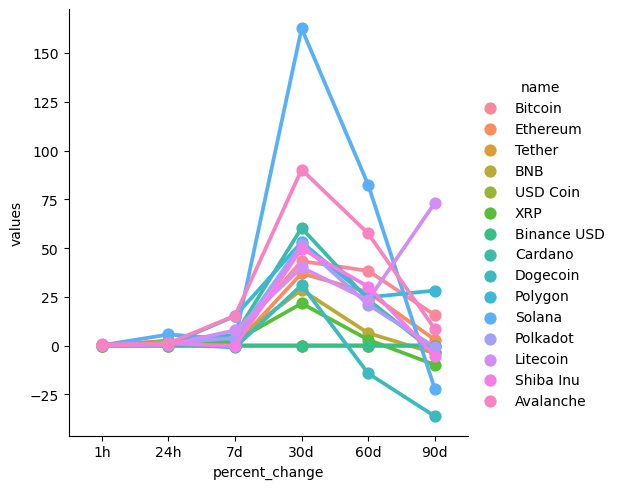

In [9]:
# Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point')

In [11]:
df8 = new_df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,23725.66849,2023-01-29 22:52:07.042060
15,Bitcoin,23717.93829,2023-01-29 22:55:45.442069


In [13]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp',y='quote.USD.price', data=df8)

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>